In [3]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.visualization import plot_histogram
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_aer import AerSimulator
from qiskit_aer.noise import(NoiseModel, QuantumError, ReadoutError, depolarizing_error, pauli_error, thermal_relaxation_error)

In [4]:
p_error=0.05
bit_flip=pauli_error([("X", p_error), ("I", 1-p_error)])
phase_flip=pauli_error([("Z", p_error), ("I", 1-p_error)])
print("Bit_flip: ", bit_flip)
print("Phase flip: ", phase_flip)

Bit_flip:  QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.05, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(1) = 0.95, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
Phase flip:  QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.05, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
  P(1) = 0.95, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘


In [5]:
bitphase_flip=bit_flip.compose(phase_flip)
print(bitphase_flip)

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.0025000000000000005, Circuit = 
   ┌───┐┌───┐
q: ┤ X ├┤ Z ├
   └───┘└───┘
  P(1) = 0.0475, Circuit = 
   ┌───┐┌───┐
q: ┤ X ├┤ I ├
   └───┘└───┘
  P(2) = 0.0475, Circuit = 
   ┌───┐┌───┐
q: ┤ I ├┤ Z ├
   └───┘└───┘
  P(3) = 0.9025, Circuit = 
   ┌───┐┌───┐
q: ┤ I ├┤ I ├
   └───┘└───┘


In [6]:
bit_flip_kraus=Kraus(bit_flip)
print(bit_flip_kraus)

Kraus([[[-9.74679434e-01+0.j,  0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j, -9.74679434e-01+0.j]],

       [[ 0.00000000e+00+0.j,  2.23606798e-01+0.j],
        [ 2.23606798e-01+0.j, -4.96506831e-17+0.j]]],
      input_dims=(2,), output_dims=(2,))


In [7]:
phase_flip_sop=SuperOp(phase_flip)
print(phase_flip_sop)

SuperOp([[1. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
         [0. +0.j, 0.9+0.j, 0. +0.j, 0. +0.j],
         [0. +0.j, 0. +0.j, 0.9+0.j, 0. +0.j],
         [0. +0.j, 0. +0.j, 0. +0.j, 1. +0.j]],
        input_dims=(2,), output_dims=(2,))


In [8]:
print(QuantumError(bit_flip_kraus))
QuantumError(bit_flip_kraus)==bit_flip

QuantumError on 1 qubits. Noise circuits:
  P(0) = 1.0, Circuit = 
   ┌───────┐
q: ┤ kraus ├
   └───────┘


True

In [10]:
p0given1=0.1
p1given0=0.05
ReadoutError([[1-p1given0, p1given0],[p0given1,1-p0given1]])

ReadoutError([[0.95 0.05]
 [0.1  0.9 ]])

In [11]:
noise_model=NoiseModel()
error=depolarizing_error(0.05,1)
noise_model.add_all_qubit_quantum_error(error, ['u1','u2','u3'])
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u2', 'u1', 'u3']
  All-qubits errors: ['u1', 'u2', 'u3']


In [13]:
noise_model=NoiseModel()
error=depolarizing_error(0.05,1)
noise_model.add_quantum_error(error, ['u1','u2','u3'], [0])
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u2', 'u1', 'u3']
  Qubits with noise: [0]
  Specific qubit errors: [('u1', (0,)), ('u2', (0,)), ('u3', (0,))]


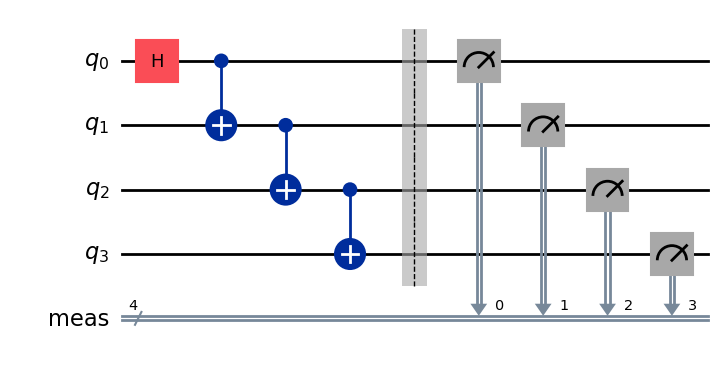

In [15]:
n_qubits=4
circ=QuantumCircuit(n_qubits)
circ.h(0)
for qubit in range(n_qubits-1):
    circ.cx(qubit, qubit+1)
circ.measure_all()
circ.draw('mpl')

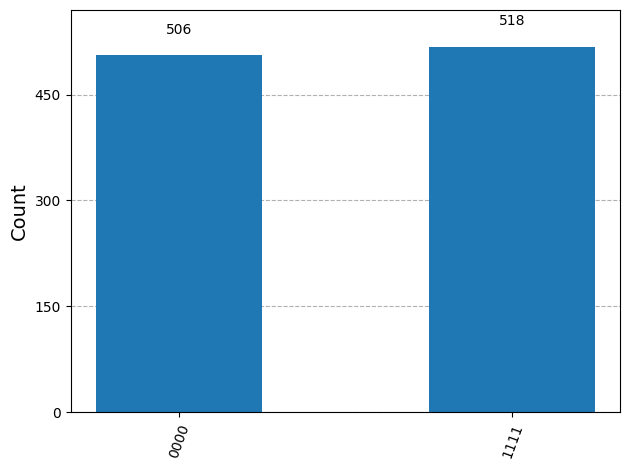

In [17]:
sim_ideal=AerSimulator()
job=sim_ideal.run(circ)
count=job.result().get_counts()
plot_histogram(count)

In [19]:
p_reset=0.03
p_meas=0.1
p_gate1=0.05
error_reset=pauli_error([("X", p_reset), ("I", 1-p_reset)])
error_meas=pauli_error([("X", p_meas), ("I", 1-p_meas)])
error_gate1=pauli_error([("X", p_gate1), ("I", 1-p_gate1)])
error_gate2=error_gate1.tensor(error_gate1)

noise_bit_flip=NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])
print(noise_bit_flip)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u2', 'cx', 'reset', 'u1', 'measure', 'u3']
  All-qubits errors: ['reset', 'measure', 'u1', 'u2', 'u3', 'cx']


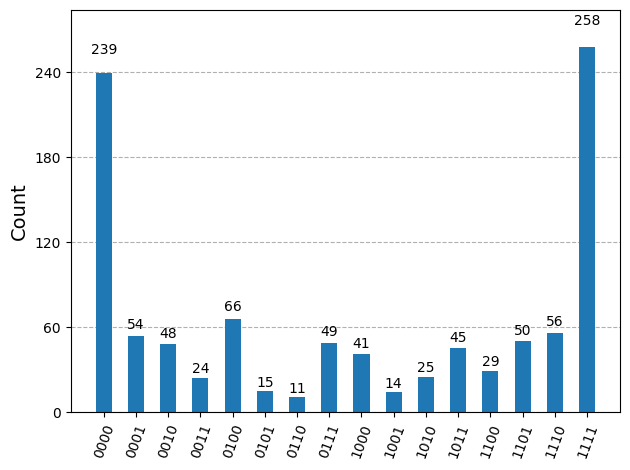

In [21]:
sim_noise=AerSimulator(noise_model=noise_bit_flip)
passmanager=generate_preset_pass_manager(optimization_level=3, backend=sim_noise)
circ_tnoise=passmanager.run(circ)
result_bit_flip=sim_noise.run(circ_tnoise).result()
count_bit_flip=result_bit_flip.get_counts(0)
plot_histogram(count_bit_flip)

In [26]:
T1s=np.random.normal(50e3, 10e3, 4)
T2s=np.random.normal(70e3, 10e3, 4)
T2s=np.array([min(T2s[j], 2*T1s[j]) for j in range(4)])

time_u1=0
time_u2=50
time_u3=100
time_cx=300
time_reset=1000
time_measure=1000
errors_reset=[thermal_relaxation_error(t1,t2, time_reset) for t1,t2 in zip(T1s,T2s)]
errors_measure=[thermal_relaxation_error(t1,t2, time_measure) for t1,t2 in zip(T1s, T2s)]
errors_u1=[thermal_relaxation_error(t1, t2, time_u1) for t1, t2 in zip(T1s, T2s)]
errors_u2=[thermal_relaxation_error(t1, t2, time_u2) for t1, t2 in zip(T1s, T2s)]
errors_u3=[thermal_relaxation_error(t1, t2, time_u3) for t1, t2 in zip(T1s, T2s)]
errors_cx=[[thermal_relaxation_error(t1a, t2a, time_cx).expand(thermal_relaxation_error(t1b, t2b, time_cx))for t1a, t2a in zip(T1s, T2s)] for t1b, t2b in zip(T1s, T2s)]

noise_thermal=NoiseModel()
for j in range(4):
    noise_thermal.add_quantum_error(errors_reset[j], "reset", [j])
    noise_thermal.add_quantum_error(errors_measure[j], "measure", [j])
    noise_thermal.add_quantum_error(errors_u1[j], "u1", [j])
    noise_thermal.add_quantum_error(errors_u2[j], "u2", [j])
    noise_thermal.add_quantum_error(errors_u3[j], "u3", [j])
    for k in range(4):
        noise_thermal.add_quantum_error(errors_cx[j][k], "cx", [j,k])

print(noise_thermal)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u2', 'u3']
  Instructions with noise: ['u2', 'cx', 'reset', 'measure', 'u3']
  Qubits with noise: [0, 1, 2, 3]
  Specific qubit errors: [('reset', (0,)), ('reset', (1,)), ('reset', (2,)), ('reset', (3,)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,)), ('measure', (3,)), ('u2', (0,)), ('u2', (1,)), ('u2', (2,)), ('u2', (3,)), ('u3', (0,)), ('u3', (1,)), ('u3', (2,)), ('u3', (3,)), ('cx', (0, 0)), ('cx', (0, 1)), ('cx', (0, 2)), ('cx', (0, 3)), ('cx', (1, 0)), ('cx', (1, 1)), ('cx', (1, 2)), ('cx', (1, 3)), ('cx', (2, 0)), ('cx', (2, 1)), ('cx', (2, 2)), ('cx', (2, 3)), ('cx', (3, 0)), ('cx', (3, 1)), ('cx', (3, 2)), ('cx', (3, 3))]


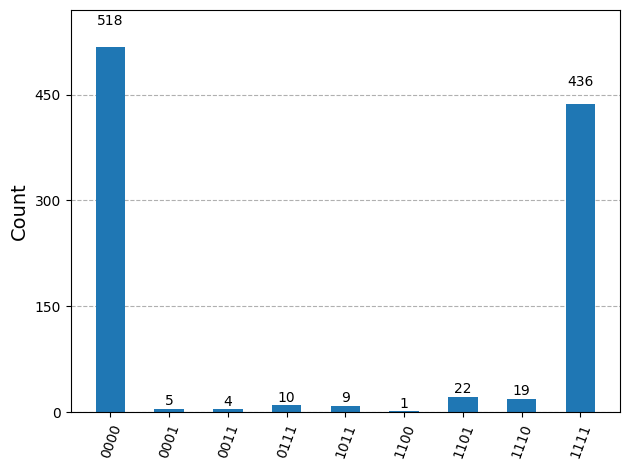

In [28]:
sim_thermal=AerSimulator(noise_model=noise_thermal)
passmanager=generate_preset_pass_manager(optimization_level=3, backend=sim_thermal)
circ_tnoise=passmanager.run(circ)
result_thermal=sim_thermal.run(circ_tnoise).result()
counts_thermal=result_thermal.get_counts(0)
plot_histogram(counts_thermal)